In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
happines_data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [24]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gr_boosting = GradientBoostingRegressor(random_state=0,
                                        loss='lad',
                                        n_estimators=110,
                                        max_depth=1,
                                        learning_rate=0.05,
                                        min_samples_split=0.32,
                                        min_samples_leaf=0.21,
                                        max_features=6)
gr_boosting.fit(X_train, y_train)

gr_boosting.score(X_test, y_test)

0.7212788885878922

In [72]:
for i in range(1,32,1):
    gr_boosting = GradientBoostingRegressor(random_state=0,
                                            loss='lad',
                                            n_estimators=110,
                                            max_depth=i,
                                            learning_rate=0.05,
                                            min_samples_split=0.32,
                                            min_samples_leaf=0.21,
                                            max_features=6)
    gr_boosting.fit(X_train, y_train)

    print(str(i)+" - "+str(gr_boosting.score(X_test, y_test)))

1 - 0.7749552225857416
2 - 0.747060821338567
3 - 0.7543862771282634
4 - 0.7543862771282634
5 - 0.7543862771282634
6 - 0.7543862771282634
7 - 0.7543862771282634
8 - 0.7543862771282634
9 - 0.7543862771282634
10 - 0.7543862771282634
11 - 0.7543862771282634
12 - 0.7543862771282634
13 - 0.7543862771282634
14 - 0.7543862771282634
15 - 0.7543862771282634
16 - 0.7543862771282634
17 - 0.7543862771282634
18 - 0.7543862771282634
19 - 0.7543862771282634
20 - 0.7543862771282634
21 - 0.7543862771282634
22 - 0.7543862771282634
23 - 0.7543862771282634
24 - 0.7543862771282634
25 - 0.7543862771282634
26 - 0.7543862771282634
27 - 0.7543862771282634
28 - 0.7543862771282634
29 - 0.7543862771282634
30 - 0.7543862771282634
31 - 0.7543862771282634


In [6]:
from sklearn import metrics

pred = gr_boosting.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.421287755666388
Mean Squared Error: 0.33766852556786897
Root Mean Squared Error: 0.5810925275443395


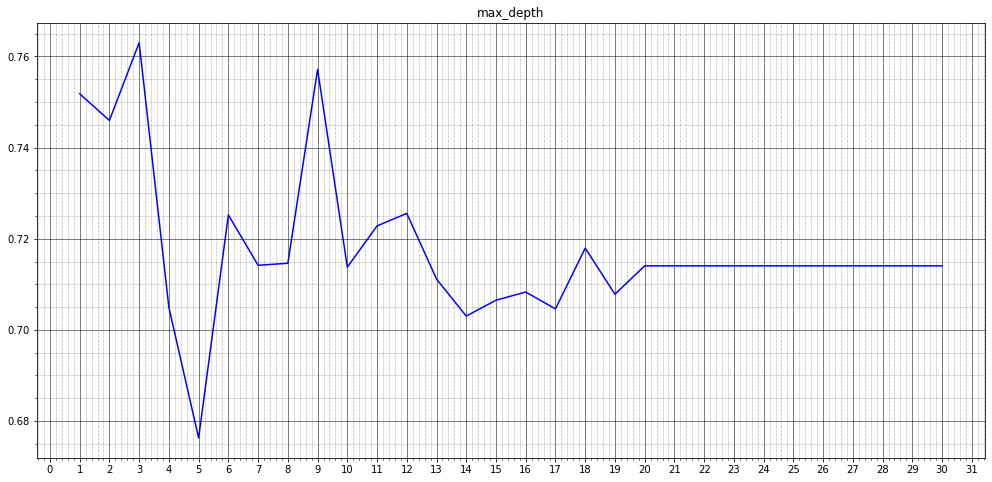

In [71]:
max_depths = np.arange(1, 31, 1)
results = []

for feature in max_depths:
    rf = GradientBoostingRegressor(random_state=0, max_depth=feature, loss='lad')
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(max_depths, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('max_depth')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

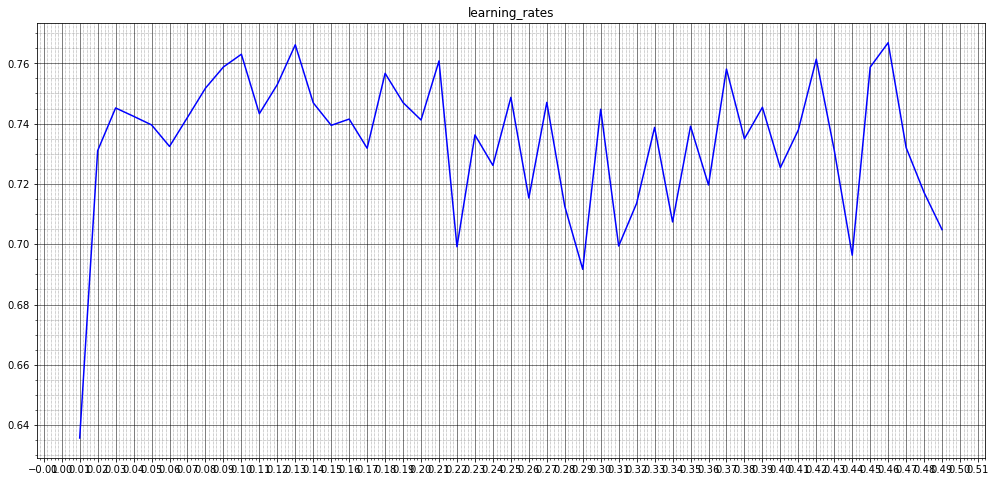

In [78]:
learning_rates = np.arange(0.01, 0.5, 0.01)
results = []

for feature in learning_rates:
    rf = GradientBoostingRegressor(random_state=0, learning_rate=feature, loss='lad')
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(learning_rates, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('learning_rates')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.01))

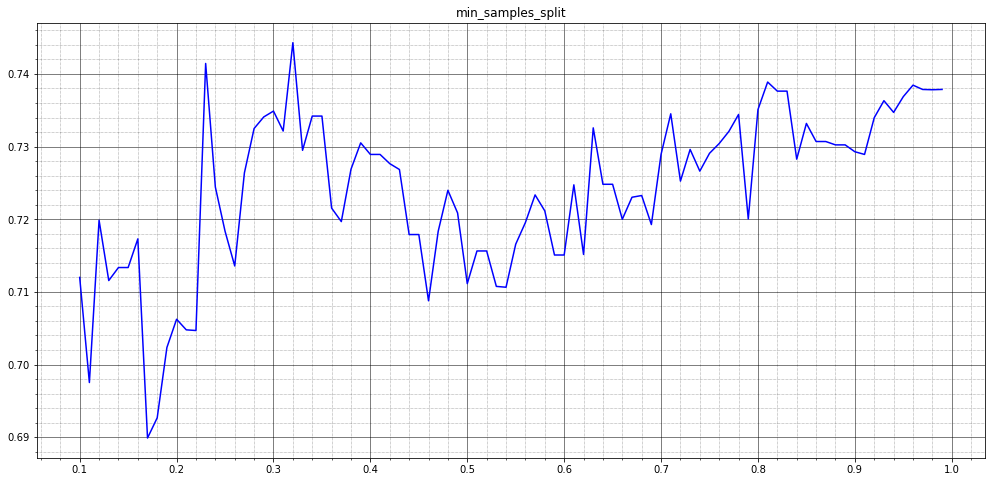

In [19]:
min_samples_splits = np.arange(0.1, 1, 0.01)
results = []

for feature in min_samples_splits:
    rf = GradientBoostingRegressor(random_state=0, min_samples_split=feature)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(min_samples_splits, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('min_samples_split')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))

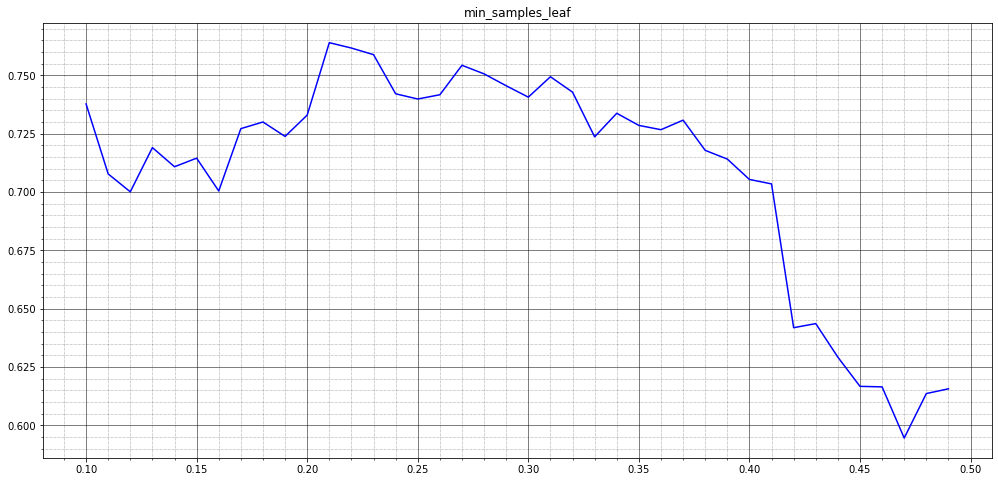

In [21]:
min_samples_leafs = np.arange(0.1, 0.5, 0.01)
results = []

for feature in min_samples_leafs:
    rf = GradientBoostingRegressor(random_state=0, min_samples_leaf=feature)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(min_samples_leafs, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('min_samples_leaf')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.05))

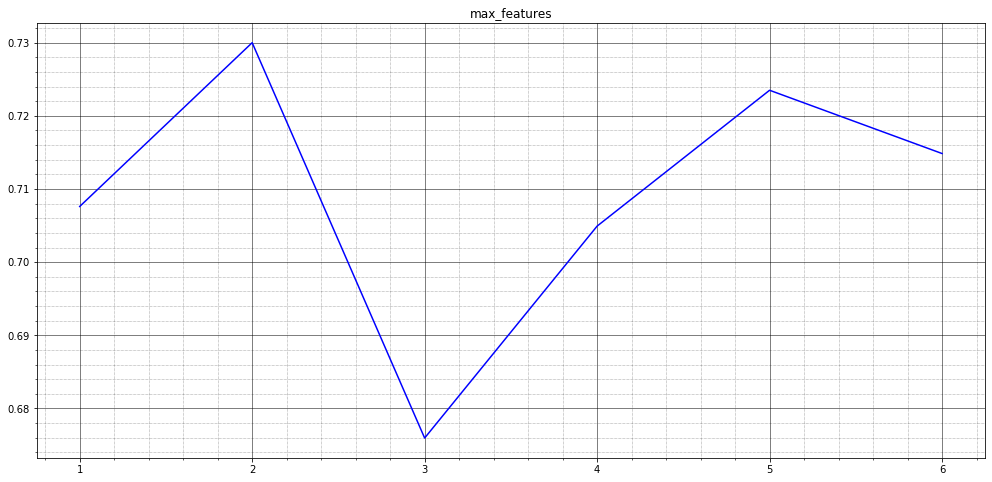

In [33]:
max_features  = list(range(1,X.shape[1]+1))
results = []

for feature in max_features :
    rf = GradientBoostingRegressor(random_state=0, max_features=feature)
    rf.fit(X_train, y_train)
        
    results.append(rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 

plt.plot(max_features, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.title('max_features')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))